<a href="https://colab.research.google.com/github/sunandhini96/ERA_Session5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cloning the repository from our github repo

# Installation

# cloning the repository

In [1]:
!git clone https://github.com/sunandhini96/ERA_Session5.git

Cloning into 'ERA_Session5'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), 151.33 KiB | 6.58 MiB/s, done.


In [2]:
cd "/content/ERA_Session5"

/content/ERA_Session5


In [3]:
pwd


'/content/ERA_Session5'

In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import model

In [6]:
#import utils

In [7]:
!python model.py

In [8]:
!python utils.py

In [9]:
from model import *
from utils import *

In [10]:
# Checking cuda availability
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [11]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=False, transform=test_transforms)
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 206445822.22it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30846879.00it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 78442595.10it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2863449.39it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# printing the train data images with labels

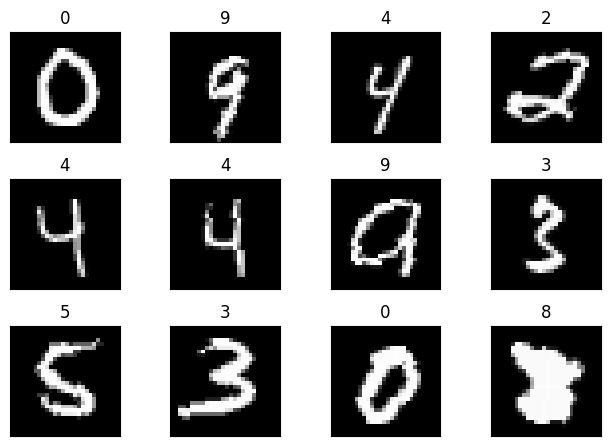

In [12]:
#import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

# calling the model function and printing the summary

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


# Training and Testing the model

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  scheduler.step()
  test(model, device, test_loader)
  

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2281 Batch_id=117 Accuracy=52.08: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.2424, Accuracy: 9266/10000 (92.66%)

Epoch 2


Train: Loss=0.1809 Batch_id=117 Accuracy=93.81: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0849, Accuracy: 9741/10000 (97.41%)

Epoch 3


Train: Loss=0.1854 Batch_id=117 Accuracy=96.35: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0676, Accuracy: 9791/10000 (97.91%)

Epoch 4


Train: Loss=0.1071 Batch_id=117 Accuracy=96.90: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0466, Accuracy: 9850/10000 (98.50%)

Epoch 5


Train: Loss=0.1879 Batch_id=117 Accuracy=97.60: 100%|██████████| 118/118 [00:29<00:00,  4.04it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0472, Accuracy: 9843/10000 (98.43%)

Epoch 6


Train: Loss=0.0993 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0440, Accuracy: 9860/10000 (98.60%)

Epoch 7


Train: Loss=0.0933 Batch_id=117 Accuracy=98.06: 100%|██████████| 118/118 [00:27<00:00,  4.23it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0403, Accuracy: 9878/10000 (98.78%)

Epoch 8


Train: Loss=0.1320 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [00:27<00:00,  4.36it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0317, Accuracy: 9899/10000 (98.99%)

Epoch 9


Train: Loss=0.0296 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:27<00:00,  4.25it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0324, Accuracy: 9886/10000 (98.86%)

Epoch 10


Train: Loss=0.0209 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:27<00:00,  4.23it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0340, Accuracy: 9901/10000 (99.01%)

Epoch 11


Train: Loss=0.0091 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:27<00:00,  4.24it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0337, Accuracy: 9876/10000 (98.76%)

Epoch 12


Train: Loss=0.0238 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:27<00:00,  4.25it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0294, Accuracy: 9897/10000 (98.97%)

Epoch 13


Train: Loss=0.0102 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:27<00:00,  4.30it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0350, Accuracy: 9888/10000 (98.88%)

Epoch 14


Train: Loss=0.1072 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:28<00:00,  4.20it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0268, Accuracy: 9913/10000 (99.13%)

Epoch 15


Train: Loss=0.0357 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:27<00:00,  4.30it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0271, Accuracy: 9909/10000 (99.09%)

Epoch 16


Train: Loss=0.0042 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:27<00:00,  4.29it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0231, Accuracy: 9920/10000 (99.20%)

Epoch 17


Train: Loss=0.0773 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:28<00:00,  4.16it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0228, Accuracy: 9922/10000 (99.22%)

Epoch 18


Train: Loss=0.0372 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:27<00:00,  4.28it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0230, Accuracy: 9923/10000 (99.23%)

Epoch 19


Train: Loss=0.0504 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [00:27<00:00,  4.24it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0221, Accuracy: 9926/10000 (99.26%)

Epoch 20


Train: Loss=0.0542 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:27<00:00,  4.35it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0223, Accuracy: 9922/10000 (99.22%)



# plotting

Text(0.5, 1.0, 'Test Accuracy')

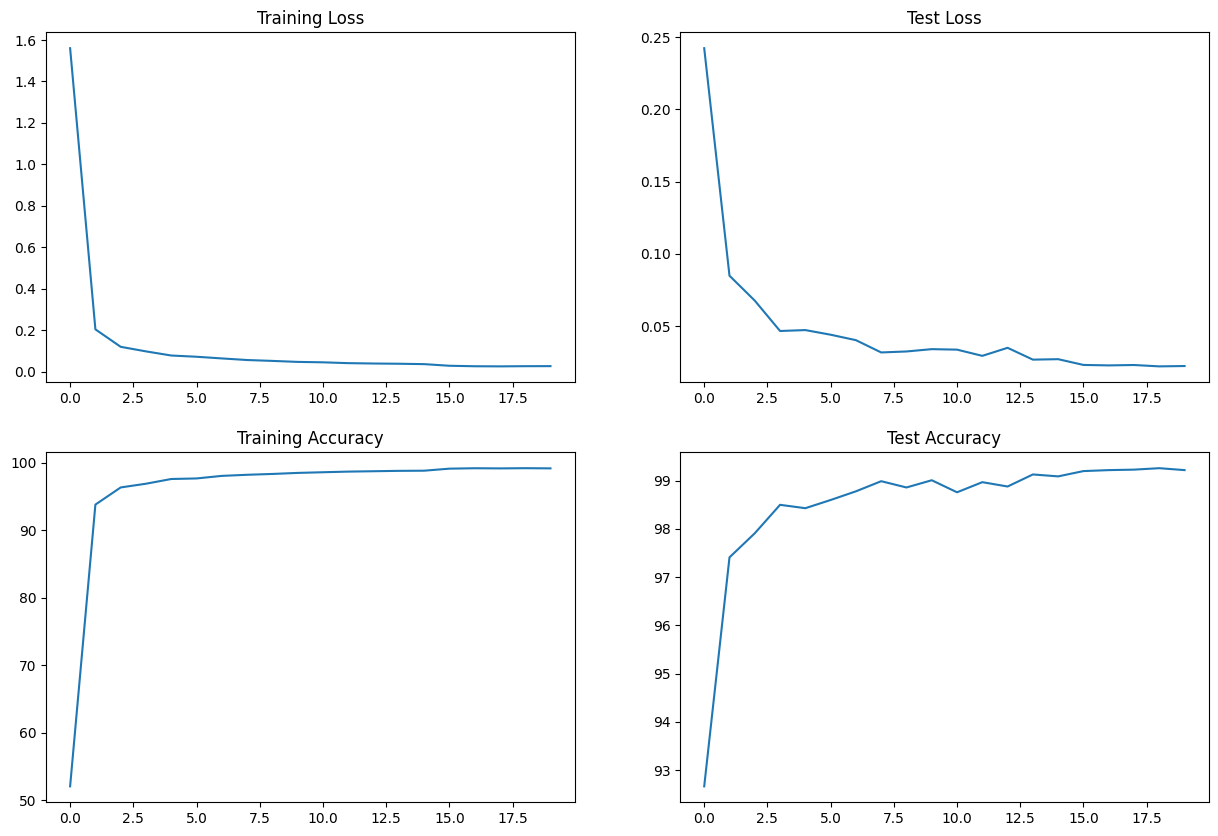

In [15]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")